Importing Libraries


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


Step 3 :Collecting DataSets

In [4]:
df1 = pd.read_csv("/content/EV Stats-1 (1).csv")


In [5]:
df2 = pd.read_csv("/content/RS_Session_256_AU_2673_2.ii_.csv")


In [6]:
df3 = pd.read_csv("/content/electric_vehicle_charging_station_list (2).csv")


In [7]:
df4 = pd.read_csv("/content/multiTimeline.csv")


Step 4: Exploring the data

In [8]:
df1.head()


,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381


In [9]:

df2.head()


,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20
3,4,Expressways,Bengaluru Mysore,14
4,5,Expressways,Bangaluru-Chennai,30


In [10]:

df3.head()


,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [11]:

df4.head()


,Category: All categories
Month,Electric vehicle: (India)
2004-01,73
2004-02,0
2004-03,100
2004-04,0


In [12]:
print('DF1 Shape: ', df1.shape)

print('DF2 Shape: ', df2.shape)

print('DF3 Shape: ', df3.shape)

print('DF4 Shape:', df4.shape)

DF1 Shape:  (30, 10)
DF2 Shape:  (26, 4)
DF3 Shape:  (202, 9)
DF4 Shape: (237, 1)


In [13]:
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())
print(' <<< DATASET 3 -----------------------------------------------------------')
print(df3.info())
print(' <<< DATASET 4 -----------------------------------------------------------')
print(df4.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              30 non-null     int64 
 1   State                                                               30 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)         

In [14]:
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
d4 = df4.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2, '<<< DATASET 3 >>>', d3, '<<< DATASET 3 >>>', d3)

'<<< DATASET 1 >>>'

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,918.300000,468.966667,3751.266667,12.966667,24.000000,3519.033333,0.900000,8695.433333
std,8.803408,1482.441466,625.711098,4383.917198,30.737468,41.484521,4860.187299,3.835856,9911.814513
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.250000,19.000000,18.500000,65.000000,0.000000,0.000000,222.250000,0.000000,589.500000
50%,15.500000,447.500000,222.500000,2113.000000,0.000000,0.500000,985.500000,0.000000,4206.000000
75%,22.750000,762.500000,706.250000,5003.750000,6.000000,33.750000,5303.250000,0.000000,13951.500000
max,30.000000,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000


'<<< DATASET 2 >>>'

,EV Charging Stations Sanctioned
count,26.000000
mean,121.230769
std,299.562389
min,10.000000
25%,30.000000
50%,63.000000
75%,95.000000
max,1576.000000


'<<< DATASET 3 >>>'

,no,latitude,longitude
count,202.000000,202.000000,202.000000
mean,101.500000,25.960987,78.418002
std,58.456537,5.616108,3.097664
min,1.000000,8.481051,76.277781
25%,51.250000,28.535516,77.212996
50%,101.500000,28.580286,77.226252
75%,151.750000,28.617783,77.375216
max,202.000000,28.642892,88.509064


'<<< DATASET 3 >>>'

,no,latitude,longitude
count,202.000000,202.000000,202.000000
mean,101.500000,25.960987,78.418002
std,58.456537,5.616108,3.097664
min,1.000000,8.481051,76.277781
25%,51.250000,28.535516,77.212996
50%,101.500000,28.580286,77.226252
75%,151.750000,28.617783,77.375216
max,202.000000,28.642892,88.509064


<ipython-input-15-22de0a2e4ee4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df3.corr(),linewidths=1,linecolor='white',annot=True)


<Axes: >

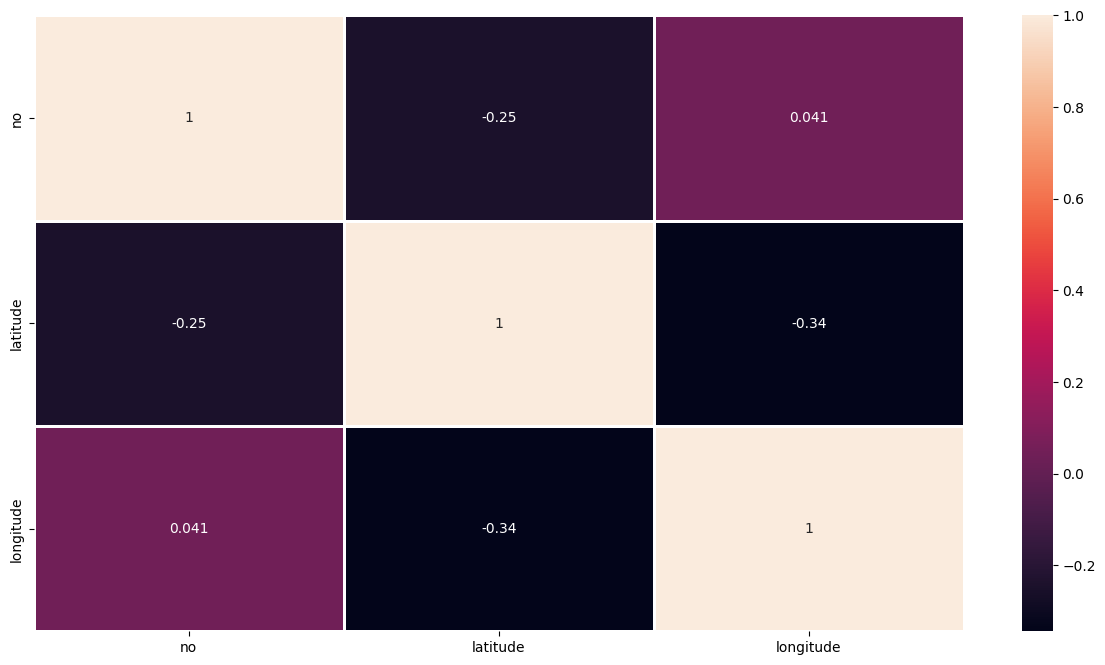

In [15]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(df3.corr(),linewidths=1,linecolor='white',annot=True)

<ipython-input-16-8e66ebe7c2c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', palette='viridis')


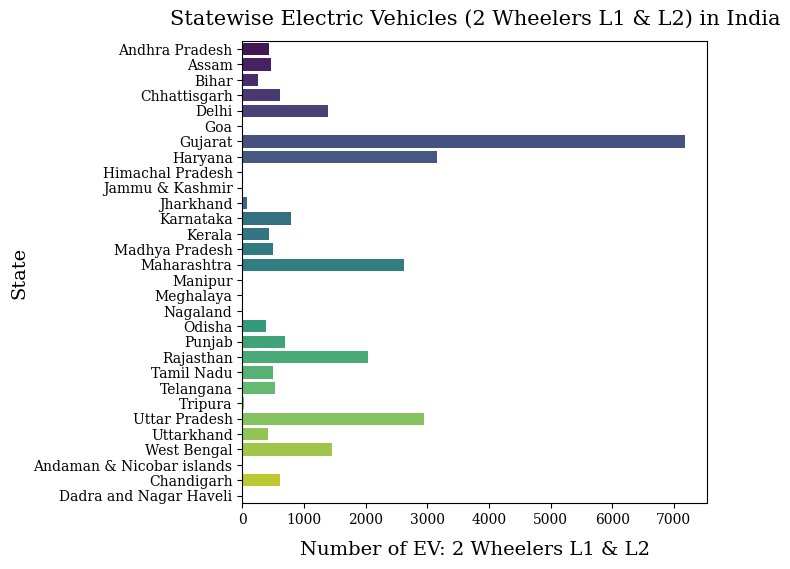

In [16]:
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers L1 & L2', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers L1 & L2) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-17-c5bfd27c6bac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Category L2 (CMVR))', palette='viridis')


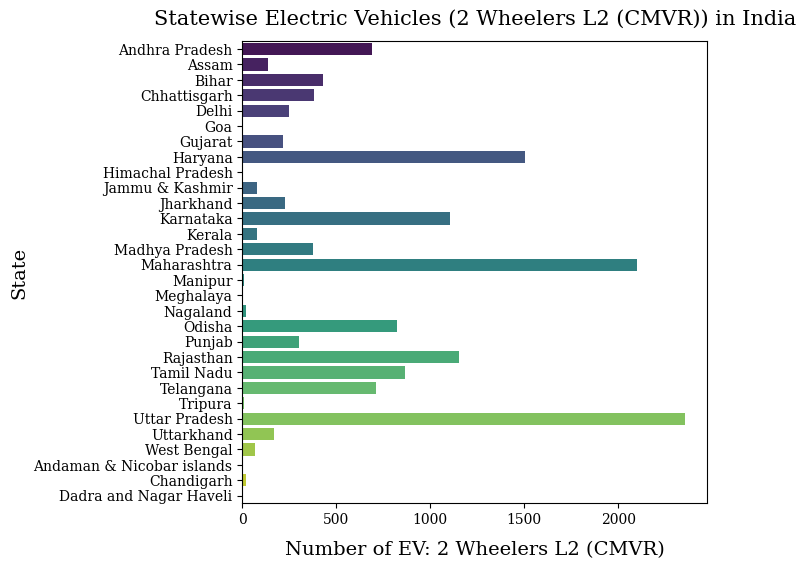

In [17]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Category L2 (CMVR))', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers L2 (CMVR)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers L2 (CMVR)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-18-6536f8388dce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Max power not exceeding 250 Watts)', palette='viridis')


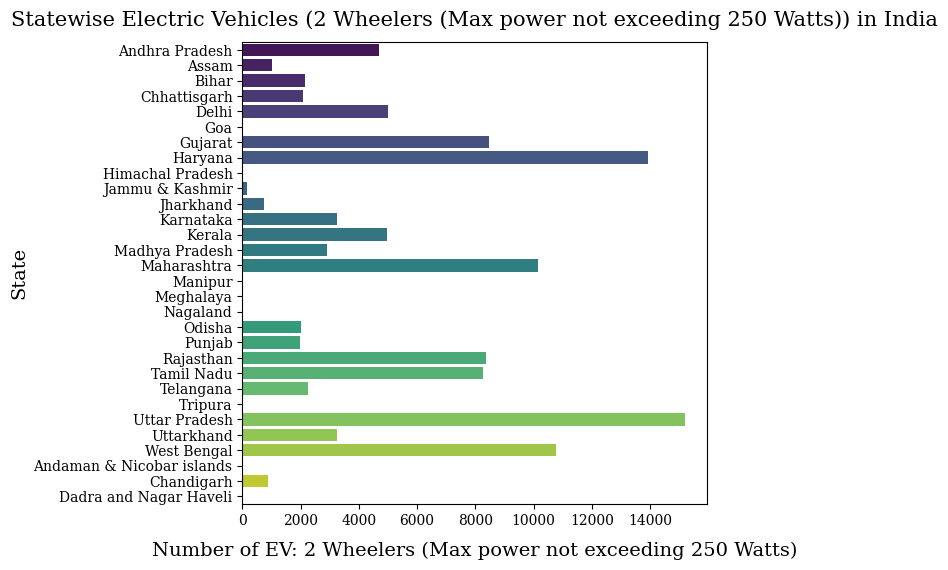

In [18]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Max power not exceeding 250 Watts)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers (Max power not exceeding 250 Watts)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers (Max power not exceeding 250 Watts)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-19-1b15f0988dc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 slow speed as per CMVR)', palette='viridis')


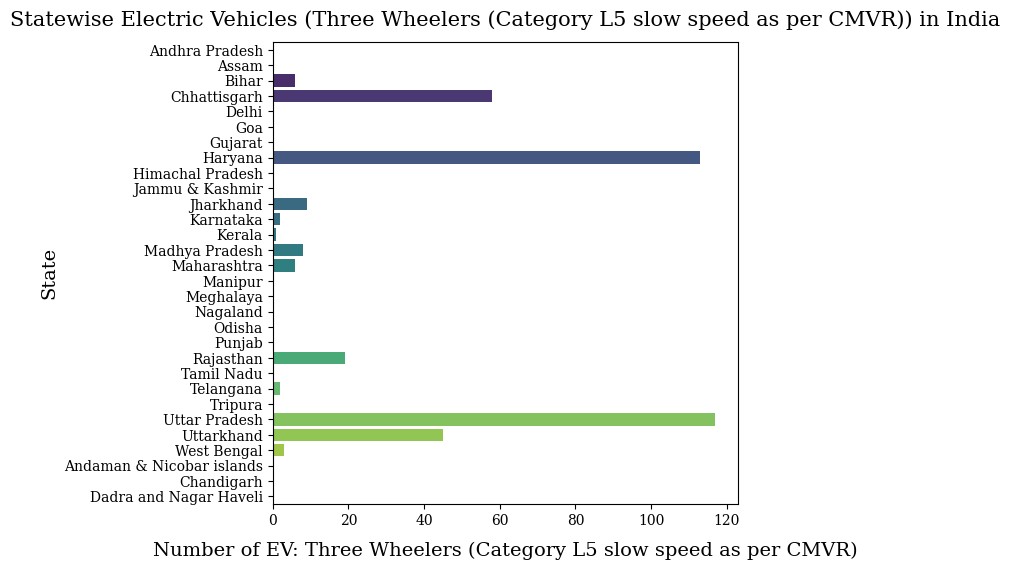

In [19]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 slow speed as per CMVR)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Three Wheelers (Category L5 slow speed as per CMVR)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (Three Wheelers (Category L5 slow speed as per CMVR)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-20-85476dedd36e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 as per CMVR)', palette='viridis')


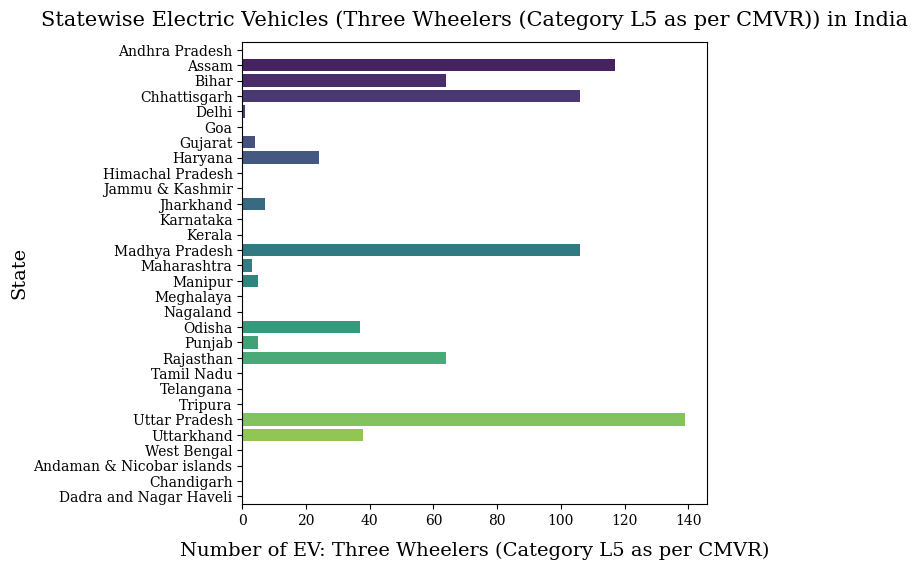

In [20]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 as per CMVR)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Three Wheelers (Category L5 as per CMVR)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (Three Wheelers (Category L5 as per CMVR)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-21-5f3f5688916d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Passenger Cars (Category M1 as per CMVR)', palette='viridis')


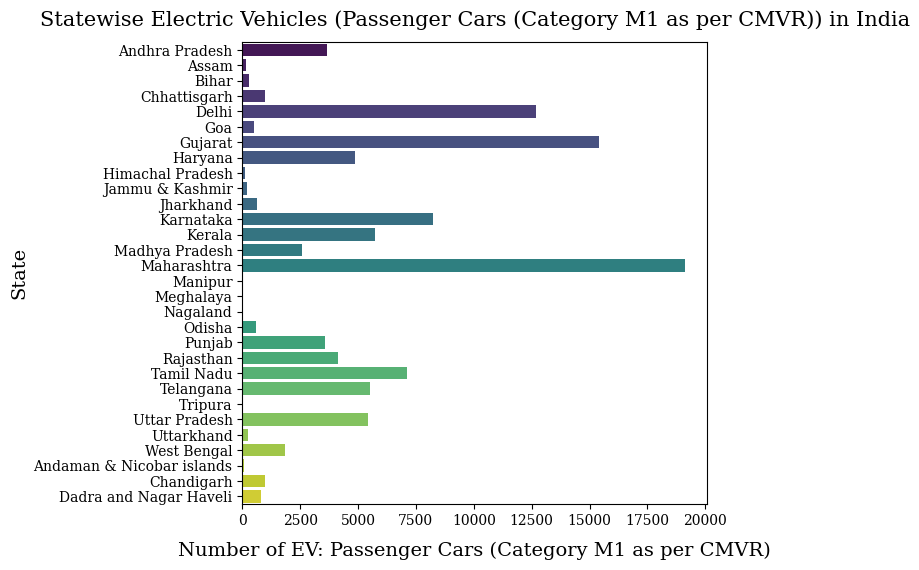

In [21]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Passenger Cars (Category M1 as per CMVR)', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: Passenger Cars (Category M1 as per CMVR)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (Passenger Cars (Category M1 as per CMVR)) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

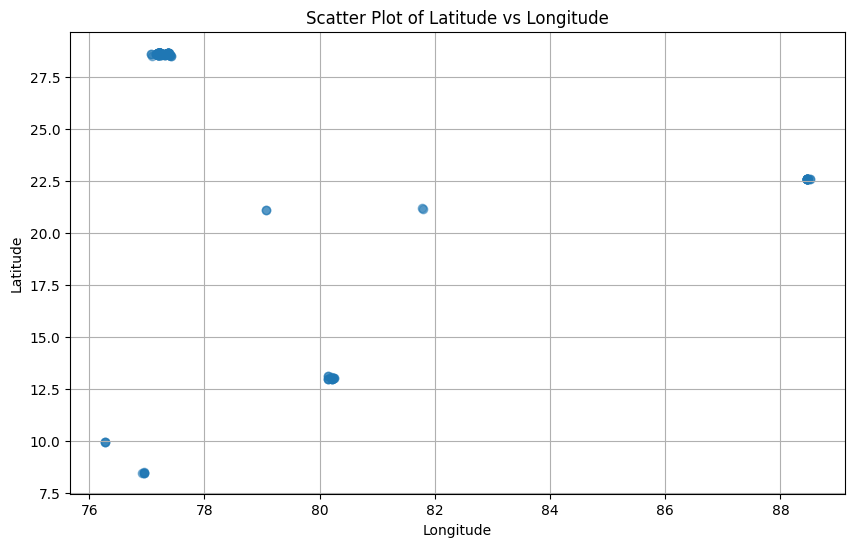

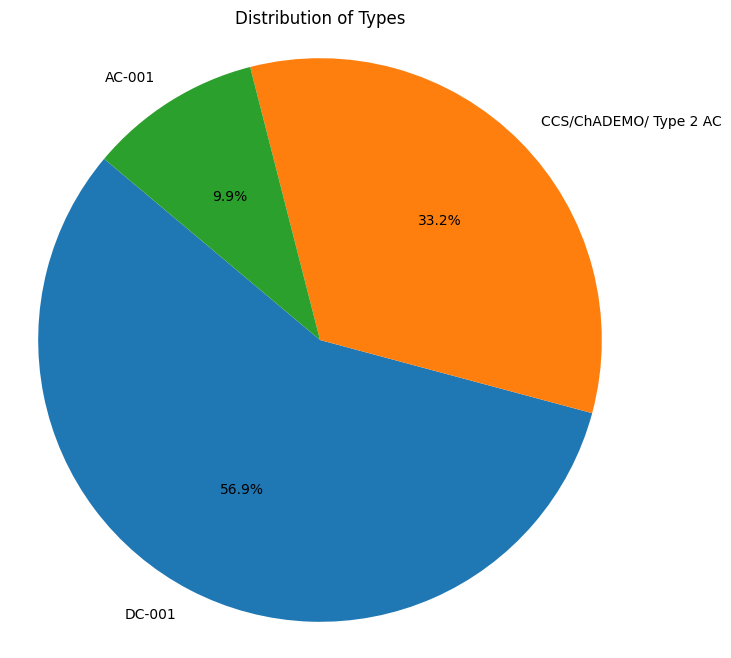

Basic Analysis:
Total number of data points: 202
Unique types: 3

Types Distribution:
DC-001                    115
CCS/ChADEMO/ Type 2 AC     67
AC-001                     20
Name: type, dtype: int64


In [23]:
import matplotlib.pyplot as plt

# Scatter plot for Latitude and Longitude
plt.figure(figsize=(10, 6))
plt.scatter(df3['longitude'], df3['latitude'], alpha=0.5)
plt.title('Scatter Plot of Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Pie chart for 'type' column
type_counts = df3['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Basic Analysis
print("Basic Analysis:")
print("Total number of data points:", len(df3))
print("Unique types:", df3['type'].nunique())
print("\nTypes Distribution:")
print(type_counts)


In [24]:
import pandas as pd

# Remove the last row containing an error message or comment
df1 = df1.dropna()

# Group data by state
state_grouped = df1.groupby('State').sum()

# Add additional analysis
state_grouped['Total Vehicles'] = state_grouped.sum(axis=1)
state_grouped['Average Vehicles'] = state_grouped['Total in state'] / state_grouped['Total Vehicles']

# Display state-wise analysis
print("State-wise Analysis:")
print(state_grouped[['Total in state', 'Total Vehicles', 'Average Vehicles']])


State-wise Analysis:
                           Total in state  Total Vehicles  Average Vehicles
State                                                                      
Andaman & Nicobar islands              82             192          0.427083
Andhra Pradesh                       9492           18985          0.499974
Assam                                1875            3752          0.499733
Bihar                                3171            6345          0.499764
Chandigarh                           2500            5029          0.497117
Chhattisgarh                         4234            8472          0.499764
Dadra and Nagar Haveli                816            1662          0.490975
Delhi                               19381           38767          0.499936
Goa                                   514            1034          0.497099
Gujarat                             31267           62541          0.499944
Haryana                             23589           47186          

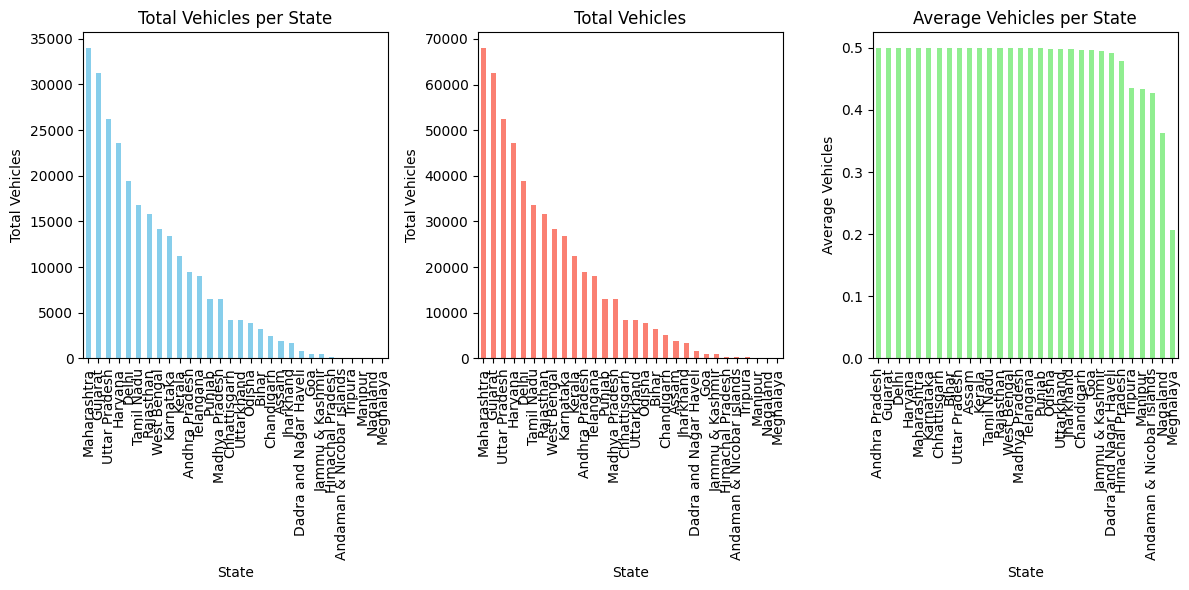

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove the last row containing an error message or comment
df1 = df1.dropna()

# Group data by state
state_grouped = df1.groupby('State').sum()

# Add additional analysis
state_grouped['Total Vehicles'] = state_grouped.sum(axis=1)
state_grouped['Average Vehicles'] = state_grouped['Total in state'] / state_grouped['Total Vehicles']

# Visual representation with diagrams and graphs
plt.figure(figsize=(12, 6))

# Bar plot for total vehicles per state
plt.subplot(1, 3, 1)
state_grouped['Total in state'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Vehicles per State')
plt.xlabel('State')
plt.ylabel('Total Vehicles')

# Bar plot for total vehicles
plt.subplot(1, 3, 2)
state_grouped['Total Vehicles'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Total Vehicles')
plt.xlabel('State')
plt.ylabel('Total Vehicles')

# Bar plot for average vehicles per state
plt.subplot(1, 3, 3)
state_grouped['Average Vehicles'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Average Vehicles per State')
plt.xlabel('State')
plt.ylabel('Average Vehicles')

plt.tight_layout()
plt.show()


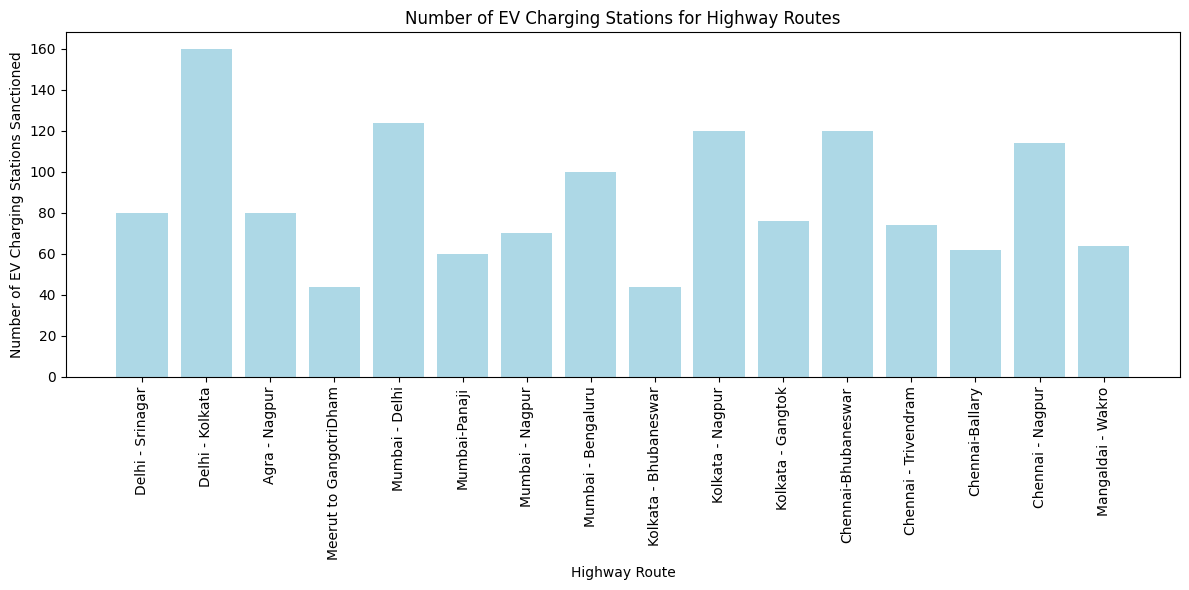

In [27]:

# Filter out only the data for highways
highways_df2 = df2[df2['Category'] == 'Highways']

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(highways_df2['Expressways/Highways'], highways_df2['EV Charging Stations Sanctioned'], color='lightblue')
plt.xlabel('Highway Route')
plt.ylabel('Number of EV Charging Stations Sanctioned')
plt.title('Number of EV Charging Stations for Highway Routes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
